# Murray's law

## Setup

In [39]:
%%javascript
$('<div id="toc"></div>').css({position: 'fixed', top: '120px', left: 0}).appendTo(document.body);
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

In [140]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import math
from numpy import linalg as LA
import scipy.optimize

from amftrack.util.sys import storage_path
from amftrack.util.image_analysis import convert_to_micrometer

In [31]:
#path = os.path.join(storage_path, "width1/measures/data_width_907_3.json")
path = "/media/kahane/AMFtopology02/storage/width_73/Hypha2"

## Fetch data

### Coordinates

Coordinates in the joystick referential

In [46]:
coordinates = {1: [28180, 48120],
2: [28180, 48040],
3: [28180, 48040],
4: [28340, 47100],
5: [28480, 46380],
6: [28480, 46380],
7: [28480, 46380],
8: [28480, 46380],
9: [28520, 46180],
10: [28520, 46180],
11: [28520, 46180],
12: [28700, 45580],
13: [28700, 45580],
14: [29060, 44980],
15: [29060, 44980],
16: [29060, 44980],
17: [29060, 44980],
18: [29100, 44020],
19: [29100, 44020],
20: [29100, 44020],
21: [29100, 44020],
22: [29580, 43660],
23: [29800, 43660],
24: [29800, 43660],
25: [29800, 43660],
26: [29800, 43660],
27: [29840, 43540],
28: [29840, 43540],
29: [29840, 43540],
30: [29840, 43540],
31: [29840, 43540],
32: [30520, 42100],
33: [30580, 41920],
34: [30580, 41920],
35: [30580, 41920],
36: [30660, 41780],
37: [30660, 41780],
38: [30660, 41780],
39: [30940, 40800],
40: [30940, 40800],
41: [31120, 40120],
42: [31120, 40120],
43: [31120, 40120],
44: [31480, 38940],
45: [31480, 38940],
46: [31480, 38940],
47: [32080, 37100],
48: [32120, 36900],
49: [32120, 36900],
50: [32840, 35960],
51: [32840, 35960],
52: [32840, 35960],
53: [33500, 35040],
54: [33500, 35040],
55: [34120, 34140],
56: [34120, 34140],
57: [34120, 34140],
58: [35600, 32840],
59: [35600, 32840],
60: [33500, 35040],
61: [33500, 35040],
62: [36380, 32300],
63: [36720, 32160], 
64: [36720, 32160],
65: [36720, 32160],
66: [36720, 32160],
67: [37920, 31600],
68: [37920, 31600],
69: [37920, 31600],
70: [37920, 31600],
71: [39340, 31080],
72: [39340, 31080],
73: [39340, 31080],
74: [39340, 31080], 
75: [39980, 30920],
76: [39980, 30920],
77: [39980, 30920],
78: [41320, 30500],
79: [41320, 30500],
80: [41760, 30320],
81: [41760, 30320],
82: [41760, 30320],
83: [42660, 29720],
84: [42660, 29720], 
85: [42660, 29720],
86: [42660, 29720],
87: [43240, 29460],
88: [43240, 29460],
89: [43240, 29460],
90: [43240, 29460],
91: [44080, 29320],
92: [44080, 29320],
93: [44080, 29320],
94: [44080, 29320],
95: [44080, 29320],
96: [45900, 29040],
97: [45900, 29040],
98: [45900, 29040],
99: [45900, 29040],
100: [45900, 29040],
101: [45900, 29040],
102: [47280, 28780],
103: [50120, 28780],
104: [51400, 29160],
105: [51400, 29160],
106: [51400, 29160],
107: [51400, 29160],
108: [53140, 29820],
109: [53140, 29820],
110: [54040, 30220],
111: [54760, 30580],
112: [54760, 30580],
}

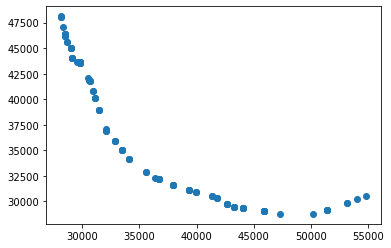

In [18]:
xs, ys = [], []
for point in coordinates.values():
    xs.append(point[0])
    ys.append(point[1])
plt.scatter(xs, ys)

### Labels

In [32]:
def is_valid(name):
    return ".json" in name

In [47]:
d = {}
d_width = {}
d_pos = {}
for file in os.listdir(path):
    d_sub = {}
    if is_valid(file):
        file_path = os.path.join(path, file)
        with open(file_path) as f:
            json_from_file = json.load(f)
        for shape in json_from_file["shapes"]:
            d_sub[shape['label']] = shape['points']
            point1 = shape["points"][0]
            point2 = shape["points"][1]
            width_pix = np.linalg.norm(np.array(point1) - np.array(point2))
            width_micro = convert_to_micrometer(
                width_pix, magnification=50
            )
            if shape['label'] in d_width:
                d_width[shape['label']].append(width_micro)
            else:
                d_width[shape['label']] = [width_micro]
                d_pos[shape['label']] = coordinates[int(file[6:-5])]
    d[file] = d_sub

In [38]:
d_width

{'main61': [7.213775508862064],
 'main10': [4.280420777413565],
 'main9': [4.5237644108026345],
 'side9_1': [3.3615842032500813],
 'main8': [4.505294117647057],
 'main7': [4.059564803166788],
 'main5': [4.013517729806865],
 'main6': [4.296044865147613],
 'side5_2': [2.750569010734427],
 'side5_1': [3.112746395621836],
 'main4': [2.6803813990632777],
 'main3': [2.531797780234433],
 'main60': [6.59863020272285],
 'side60_1': [5.807558794830681],
 'main2': [2.7074966966619325],
 'main1': [2.4368782228968184],
 'main0': [3.7826431522970636],
 'main59': [6.879675949960922],
 'side57_1': [4.3760265561465035],
 'main58': [6.241985274356987],
 'main57': [6.718678778692293],
 'main56': [6.598221909544065],
 'main55': [6.210014176512425],
 'side55_1': [3.719101069848969],
 'main54': [5.254944761312366],
 'main53': [6.224536592675566],
 'side52_1': [4.220716105644212],
 'main52': [5.709373668433477],
 'side50_1': [4.125796176758763],
 'main50': [5.999535051586882, 5.89269228061754],
 'main51': [5

In [41]:
help(d_width)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>va

In [42]:
d_width_mean = {k: np.mean(d_width[k]) for k in d_width}

In [23]:
json_from_file

{'version': '5.0.1',
 'flags': {},
 'shapes': [{'label': 'main61',
   'points': [[2395.4545454545455, 1635.7142857142858],
    [2492.207792207792, 1675.3246753246754]],
   'group_id': None,
   'shape_type': 'line',
   'flags': {}}],
 'imagePath': 'image_10.tiff',
 'imageData': None,
 'imageHeight': 3000,
 'imageWidth': 4096}

In [75]:
d_pos

{'main61': [28520, 46180],
 'main10': [45900, 29040],
 'main9': [45900, 29040],
 'side9_1': [45900, 29040],
 'main8': [47280, 28780],
 'main7': [50120, 28780],
 'main5': [51400, 29160],
 'main6': [51400, 29160],
 'side5_2': [51400, 29160],
 'side5_1': [51400, 29160],
 'main4': [53140, 29820],
 'main3': [53140, 29820],
 'main60': [28520, 46180],
 'side60_1': [28520, 46180],
 'main2': [54040, 30220],
 'main1': [54760, 30580],
 'main0': [54760, 30580],
 'main59': [28700, 45580],
 'side57_1': [29060, 44980],
 'main58': [29060, 44980],
 'main57': [29060, 44980],
 'main56': [29100, 44020],
 'main55': [29100, 44020],
 'side55_1': [29100, 44020],
 'main54': [29580, 43660],
 'main53': [29800, 43660],
 'side52_1': [29800, 43660],
 'main52': [29800, 43660],
 'side50_1': [29840, 43540],
 'main50': [29840, 43540],
 'main51': [29840, 43540],
 'main49': [30580, 41920],
 'main48': [30580, 41920],
 'side48_1': [30580, 41920],
 'main46': [30660, 41780],
 'main47': [30660, 41780],
 'side46_1': [30660, 41

In [76]:
d_distance = {k: np.round(LA.norm(np.array(d_pos[k])-np.array([54760, 30580]))) for k in d_pos}

## Visualisation

### Scatter plot

In [77]:
def seperate_dir(d):
    d_main = {}
    d_side_1 = {}
    d_side_2 = {}
    for key in d:
        if 'main' in key:
            d_main[key] = d[key]
        elif '_1' in key:
            d_side_1[key] = d[key]
        elif '_2' in key:
            d_side_2[key] = d[key]
        else:
            print(f"Error with key {key}")
    return d_main, d_side_1, d_side_2

In [78]:
a, b, c = seperate_dir(d_width_mean)
x, y, z = seperate_dir(d_distance)

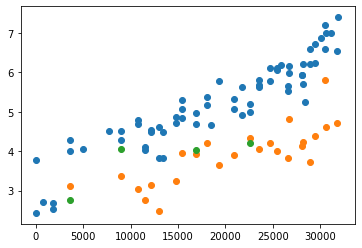

In [81]:
plt.scatter(list(x.values()), list(a.values()))
plt.scatter(list(y.values()), list(b.values()))
plt.scatter(list(z.values()), list(c.values()))

## Fetching intersections

In [114]:
main1 = []
main2 = []
side1 = []

main1_ = []
main2_ = []
side1_ = []
side2_ = []

In [123]:
indexes = []
for key in d_width:
    if "side" in key:
        indexes.append(int(key[4:-2]))
intersections = list(set(indexes))
for i in intersections:
    if f"side{i}_2" in d_width:
        # 3 exit intersection
        main1_.append(f"main{i+1}")
        main2_.append(f"main{i}")
        side1_.append(f"side{i}_1")
        side2_.append(f"side{i}_2")
    else:
        main1.append(f"main{i+1}")
        main2.append(f"main{i}")
        side1.append(f"side{i}_1")

## Murray's law coefficient

In [124]:
def F(alpha, r1, r2, r3, r4):
    return r1**alpha - r2**alpha - r3**alpha - r4**alpha

In [125]:
def F_(alpha, frac1, frac2):
    return 1 - frac1**alpha - frac2**alpha

In [126]:
d_width_mean['main62'] = 0

In [144]:
l = []
for i in range(len(main1)):
    r1 = d_width_mean[main1[i]]
    r2 = d_width_mean[main2[i]]
    r3 = d_width_mean[side1[i]]
    frac1 = r2/r1
    frac2 = r3/r1
    if r2 < r1 and r3 < r1:
        f = lambda alpha: F_(alpha, frac1, frac2)
        try:
            alpha = scipy.optimize.broyden1(f, [0.2], f_tol=1e-11)
        except:
            alpha = None
        l.append(alpha)
    else:
        l.append(np.inf)

/tmp/ipykernel_426394/1877731842.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  frac1 = r2/r1
/tmp/ipykernel_426394/1877731842.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  frac2 = r3/r1
/tmp/ipykernel_426394/30111625.py:2: RuntimeWarning: divide by zero encountered in power
  return 1 - frac1**alpha - frac2**alpha
/tmp/ipykernel_426394/30111625.py:2: RuntimeWarning: overflow encountered in power
  return 1 - frac1**alpha - frac2**alpha


In [145]:
r3

4.710460283277258

In [146]:
l

[array([3.23698017]),
 inf,
 inf,
 inf,
 array([2.21503696]),
 array([4.83406613]),
 array([3.75514157]),
 array([2.1600136]),
 inf,
 array([4.03058937]),
 array([3.7718626]),
 array([3.84793337]),
 inf,
 array([4.53376341]),
 inf,
 inf,
 array([2.25834684]),
 array([5.49798309]),
 inf,
 inf,
 inf,
 array([4.84089818]),
 array([5.68572722]),
 inf,
 array([1.9282047]),
 inf,
 array([5.53319187]),
 inf,
 inf,
 array([5.05638213]),
 array([5.30426517]),
 inf,
 inf,
 array([5.60450282]),
 inf,
 inf,
 array([3.47440992]),
 array([3.08463854]),
 inf,
 array([4.8379747]),
 None,
 array([2.73763091])]

In [151]:
l_ = [e for e in l if e!=np.inf and e is not None]

In [155]:
l_

[array([3.23698017]),
 array([2.21503696]),
 array([4.83406613]),
 array([3.75514157]),
 array([2.1600136]),
 array([4.03058937]),
 array([3.7718626]),
 array([3.84793337]),
 array([4.53376341]),
 array([2.25834684]),
 array([5.49798309]),
 array([4.84089818]),
 array([5.68572722]),
 array([1.9282047]),
 array([5.53319187]),
 array([5.05638213]),
 array([5.30426517]),
 array([5.60450282]),
 array([3.47440992]),
 array([3.08463854]),
 array([4.8379747]),
 array([2.73763091])]

In [154]:
np.mean(l_)

4.010433784614535